In [2]:
from numpy import empty, linspace, array, ones, log, exp
from scipy.linalg import lstsq, solve, qr, solve_triangular, svd, norm
from numpy.linalg import cond
from matplotlib.pyplot import figure, plot, xlim, xlabel, ylabel, grid, legend, title

### Tute 4: Data Fitting
Data:
```
i   1       2       3       4       5       6       7
ti  0       0.5     1       1.5     2       2.5     3
yi  1.2     1.5     1.9     2.4     3.2     4.3     5.4
```

### Part (A): Fitting a Linear Model

In [3]:
# (i):  Define tdat and ydat
from numpy import array, ones

tdat = array([0, 0.5, 1, 1.5, 2, 2.5, 3])
ydat = array([1.2, 1.5, 1.9, 2.4, 3.2, 4.3, 5.4])

In [5]:
# (ii): Define coefficient Matrix A
from numpy import ones

A = ones((7, 2))
A[:, 1] = tdat

# (Explanation).
#   - the (row,col) entry should be the row'th data point and the col'th feature
#       - in this case, only one feature. so rows of (1, ti) [1 for y-intercept]

In [6]:
# (iii): Least squares via 4 methods
from scipy.linalg import lstsq, solve, qr, svd
from numpy.linalg import cond, norm
from scipy.linalg import solve_triangular

# A. lstsq
x1, _, _, _ = lstsq(A, ydat)

# B. Normal equations
ATA = A.T @ A
ATy = A.T @ ydat
x2 = solve(ATA, ATy)

# C. QR factorisation
Q, R = qr(A, mode='economic')
x3 = solve_triangular(R, Q.T @ ydat)

# D. SVD
U, S, Vh = svd(A, full_matrices=False)
x4 = Vh.T @ ((U.T @ ydat) / S)

In [ ]:
# (iv). Condition Number and Residuals.
condA = cond(A)
condATA = cond(ATA)
condR = cond(R)

r1 = A @ x1 - ydat
r2 = A @ x2 - ydat
r3 = A @ x3 - ydat
r4 = A @ x4 - ydat

r1nrm = norm(r1)
r2nrm = norm(r2)
r3nrm = norm(r3)
r4nrm = norm(r4)

RSS1 = norm(r1)**2
RSS2 = norm(r2)**2
RSS3 = norm(r3)**2
RSS4 = norm(r4)**2

# Explanation.
#   - These should give roughly identical results if the system is well-conditioned.

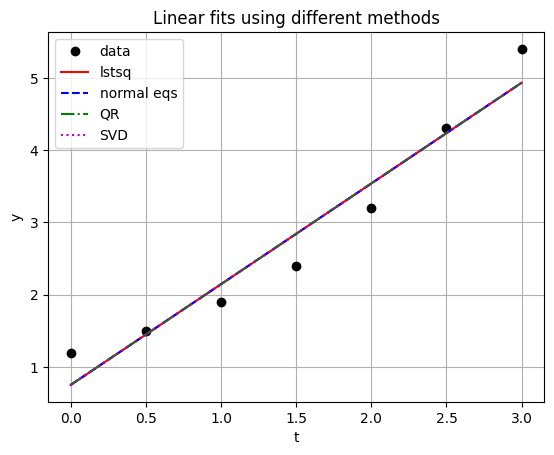

In [8]:
# (v). Plot
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, legend, grid

tfit = array([0, 0.5, 1, 1.5, 2, 2.5, 3])
fig = figure()
plot(tdat, ydat, 'ko', label='data')
plot(tfit, A @ x1, 'r-', label='lstsq')
plot(tfit, A @ x2, 'b--', label='normal eqs')
plot(tfit, A @ x3, 'g-.', label='QR')
plot(tfit, A @ x4, 'm:', label='SVD')
xlabel('t'); ylabel('y')
title('Linear fits using different methods')
grid(); legend(); 

### Part (B): Fitting a Quadratc Model

In [ ]:
# (i). Matrix A for quadratic fit
import numpy as np
from numpy import column_stack

A = column_stack((np.ones_like(tdat), tdat, tdat**2))
print(A)

# Explanation.
#   - We initially did not have a second feature that was the first squared, so we will artifically/synthetically produce this


[[1.   0.   0.  ]
 [1.   0.5  0.25]
 [1.   1.   1.  ]
 [1.   1.5  2.25]
 [1.   2.   4.  ]
 [1.   2.5  6.25]
 [1.   3.   9.  ]]


In [11]:
# (ii). Solve least squares
from scipy.linalg import lstsq, qr
from numpy.linalg import svd

# A. lstsq
x1, _, _, _ = lstsq(A, ydat)

# B. Normal equations
x2 = solve(A.T @ A, A.T @ ydat)

# C. QR factorization
Q, R = qr(A, mode='economic')
x3 = solve_triangular(R, Q.T @ ydat)

# D. SVD
U, S, Vh = svd(A, full_matrices=False)
x4 = Vh.T @ ((U.T @ ydat) / S)

In [12]:
# (iv). Compute Residuals and Norms
r1 = A @ x1 - ydat
r2 = A @ x2 - ydat
r3 = A @ x3 - ydat
r4 = A @ x4 - ydat

print("Residual norms (2-norm):")
print("lstsq:", norm(r1))
print("normal eqs:", norm(r2))
print("QR:", norm(r3))
print("SVD:", norm(r4))

print("\nResidual sum of squares:")
print("lstsq:", norm(r1)**2)
print("normal eqs:", norm(r2)**2)
print("QR:", norm(r3)**2)
print("SVD:", norm(r4)**2)

Residual norms (2-norm):
lstsq: 0.12535663410560174
normal eqs: 0.12535663410560163
QR: 0.12535663410560158
SVD: 0.12535663410560138

Residual sum of squares:
lstsq: 0.015714285714285715
normal eqs: 0.015714285714285688
QR: 0.015714285714285674
SVD: 0.015714285714285625


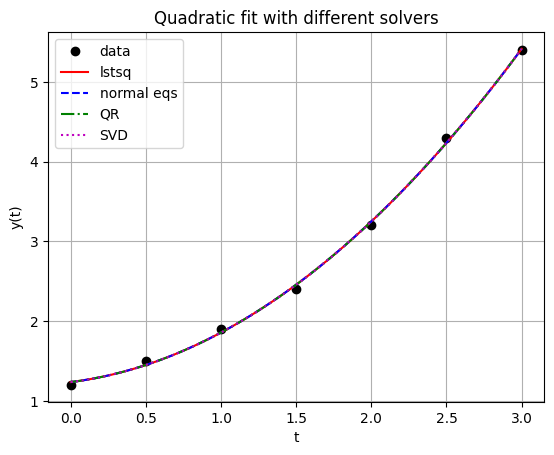

In [15]:
# (v). Plot
import matplotlib.pyplot as plt
from numpy import linspace
import numpy as np

tfit = linspace(0, 3, 100)
Afit = column_stack((np.ones_like(tfit), tfit, tfit**2))

plt.figure()
plt.plot(tdat, ydat, 'ko', label='data')
plt.plot(tfit, Afit @ x1, 'r-', label='lstsq')
plt.plot(tfit, Afit @ x2, 'b--', label='normal eqs')
plt.plot(tfit, Afit @ x3, 'g-.', label='QR')
plt.plot(tfit, Afit @ x4, 'm:', label='SVD')
plt.xlabel('t'); plt.ylabel('y(t)')
plt.title('Quadratic fit with different solvers')
plt.legend(); plt.grid()
plt.show()


[[1.  0. ]
 [1.  0.5]
 [1.  1. ]
 [1.  1.5]
 [1.  2. ]
 [1.  2.5]
 [1.  3. ]]
Estimated parameters:
alpha = 1.16323, beta = 0.50999


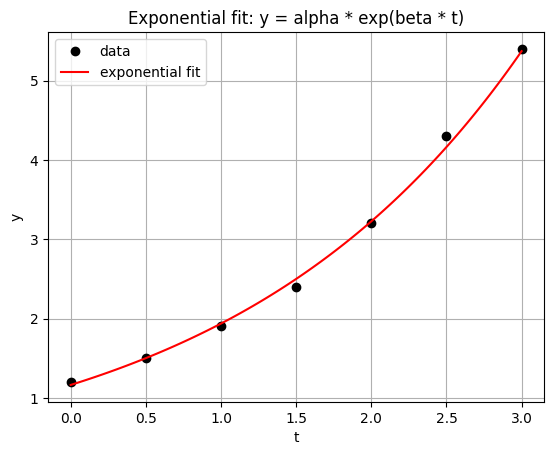

In [ ]:
# Part (D): Using the exponential function z(t) = a e^{b t}

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Given data
tdat = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
ydat = np.array([1.2, 1.5, 1.9, 2.4, 3.2, 4.3, 5.4])

# Transform: log(y) = a + beta * t
z = np.log(ydat)  # z = log(y)

# Design matrix for linear model in a and beta
A = np.column_stack((np.ones_like(tdat), tdat))
print(A)

# (Explanation).
#   - Choosing an exponential functions => we think our y's follow an exponential curve
#       - so we log it to turn it linear (while keeping x the same... 
#       - we could have also made x exponential and kept y, but then it wouldn't be linear) 

# Solve least squares
x, _, _, _ = lstsq(A, z)

a, beta = x
alpha = np.exp(a)   # (E). re-exponentiated alpha is our "proper" parameter since we compute e^{z*(t)}

# Print recovered parameters
print(f"Estimated parameters:")
print(f"alpha = {alpha:.5f}, beta = {beta:.5f}")

# Reconstruct fit
tfit = np.linspace(0, 3, 100)
yfit = alpha * np.exp(beta * tfit)  # (E). Here we need to re-exponentiate our prediction, since we are predicting linear results

# Plot
plt.figure()
plt.plot(tdat, ydat, 'ko', label='data')
plt.plot(tfit, yfit, 'r-', label='exponential fit')
plt.xlabel('t'); plt.ylabel('y')
plt.title('Exponential fit: y = alpha * exp(beta * t)')
plt.legend(); plt.grid()
plt.show()


After corrupting y[1] = 1.5 → 4.5
Residual norms (2-norm):
Linear     : 2.743238
Quadratic  : 2.596976
Exponential: 2.668715


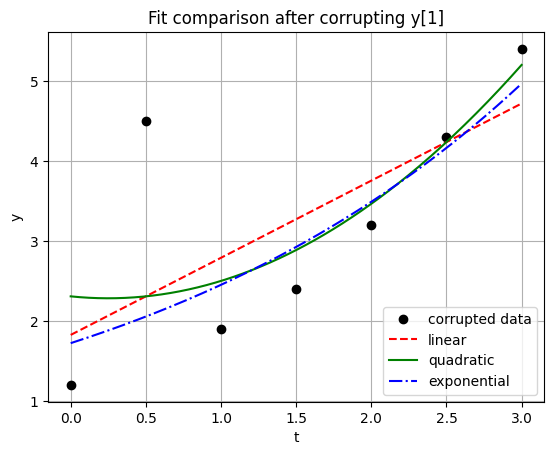

In [18]:
# Part (D): value at t2 = 0.5 became corrupted and turned into y2 = 4.5
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Original t data
tdat = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
# Corrupt y_2 (index 1) from 1.5 to 4.5
ydat = np.array([1.2, 4.5, 1.9, 2.4, 3.2, 4.3, 5.4])

# For smooth plotting
tfit = np.linspace(0, 3, 200)

# ----- Linear fit -----
A_lin = np.column_stack((np.ones_like(tdat), tdat))
x_lin, _, _, _ = lstsq(A_lin, ydat)
yfit_lin = np.column_stack((np.ones_like(tfit), tfit)) @ x_lin
res_lin = A_lin @ x_lin - ydat
res_norm_lin = np.linalg.norm(res_lin)

# ----- Quadratic fit -----
A_quad = np.column_stack((np.ones_like(tdat), tdat, tdat**2))
x_quad, _, _, _ = lstsq(A_quad, ydat)
Afit_quad = np.column_stack((np.ones_like(tfit), tfit, tfit**2))
yfit_quad = Afit_quad @ x_quad
res_quad = A_quad @ x_quad - ydat
res_norm_quad = np.linalg.norm(res_quad)

# ----- Exponential fit -----
# Only valid if y > 0
z = np.log(ydat)
A_exp = np.column_stack((np.ones_like(tdat), tdat))
x_exp, _, _, _ = lstsq(A_exp, z)
a, beta = x_exp
alpha = np.exp(a)
yfit_exp = alpha * np.exp(beta * tfit)
res_exp = alpha * np.exp(beta * tdat) - ydat
res_norm_exp = np.linalg.norm(res_exp)

# ----- Print residuals -----
print("After corrupting y[1] = 1.5 → 4.5")
print("Residual norms (2-norm):")
print(f"Linear     : {res_norm_lin:.6f}")
print(f"Quadratic  : {res_norm_quad:.6f}")
print(f"Exponential: {res_norm_exp:.6f}")

# ----- Plot the corrupted fits -----
plt.figure()
plt.plot(tdat, ydat, 'ko', label='corrupted data')
plt.plot(tfit, yfit_lin, 'r--', label='linear')
plt.plot(tfit, yfit_quad, 'g-', label='quadratic')
plt.plot(tfit, yfit_exp, 'b-.', label='exponential')
plt.xlabel('t'); plt.ylabel('y')
plt.title('Fit comparison after corrupting y[1]')
plt.legend(); plt.grid()
plt.show()



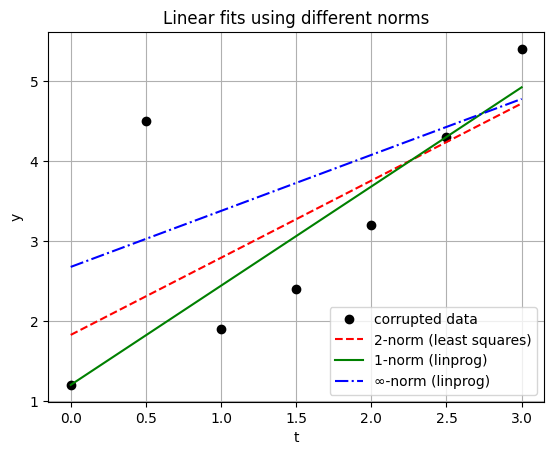

Residual Norms:
2-norm     : 2.743238
1-norm     : 4.840000
∞-norm     : 1.475000


In [19]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Data with outlier
tdat = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
ydat = np.array([1.2, 4.5, 1.9, 2.4, 3.2, 4.3, 5.4])
n = len(tdat)

# Design matrix for linear model
A = np.column_stack((np.ones_like(tdat), tdat))

# ---------- 1-norm fitting ----------
# Minimize: sum of absolute residuals → introduce residual variables r_i ≥ |Ax - y|
# Variables: [alpha, beta, r1, ..., rn]
c1 = np.concatenate([np.zeros(2), np.ones(n)])  # Objective: minimize sum of residuals

# Inequality constraints:
# r ≥ Ax - y ⇒ Ax - r ≤ y
# r ≥ y - Ax ⇒ -Ax - r ≤ -y

A1 = np.hstack([ A, -np.eye(n)])
A2 = np.hstack([-A, -np.eye(n)])
A_ineq = np.vstack([A1, A2])
b_ineq = np.concatenate([ydat, -ydat])

res1 = linprog(c1, A_ub=A_ineq, b_ub=b_ineq, method='highs')
x1 = res1.x[:2]  # alpha, beta

# ---------- ∞-norm fitting ----------
# Minimize: max residual → use a single variable t ≥ |r_i|
# Variables: [alpha, beta, t]
# Constraints: |Ax - y| ≤ t → Ax - y ≤ t and y - Ax ≤ t

c2 = np.array([0, 0, 1])
A_upper = np.hstack([A, -np.ones((n, 1))])
A_lower = np.hstack([-A, -np.ones((n, 1))])
A_inf = np.vstack([A_upper, A_lower])
b_inf = np.concatenate([ydat, -ydat])

res_inf = linprog(c2, A_ub=A_inf, b_ub=b_inf, method='highs')
xinf = res_inf.x[:2]

# ---------- 2-norm (least squares) for comparison ----------
x2, _, _, _ = lstsq(A, ydat)

# ---------- Plot ----------
tfit = np.linspace(0, 3, 200)
Afit = np.column_stack((np.ones_like(tfit), tfit))

yfit_1 = Afit @ x1
yfit_2 = Afit @ x2
yfit_inf = Afit @ xinf

plt.figure()
plt.plot(tdat, ydat, 'ko', label='corrupted data')
plt.plot(tfit, yfit_2, 'r--', label='2-norm (least squares)')
plt.plot(tfit, yfit_1, 'g-', label='1-norm (linprog)')
plt.plot(tfit, yfit_inf, 'b-.', label='∞-norm (linprog)')
plt.xlabel('t'); plt.ylabel('y')
plt.title('Linear fits using different norms')
plt.legend(); plt.grid()
plt.show()

# ---------- Report residual norms ----------
r1 = A @ x1 - ydat
r2 = A @ x2 - ydat
rinf = A @ xinf - ydat

print("Residual Norms:")
print(f"2-norm     : {np.linalg.norm(r2):.6f}")
print(f"1-norm     : {np.linalg.norm(r1, 1):.6f}")
print(f"∞-norm     : {np.linalg.norm(rinf, np.inf):.6f}")

Explanation for above:

As $p$-norm increases, the sensitivity to outliers increases (!!):
- effect of a single difference in residual is exacerbated (e.g. rooting squared sum increases effect of a large difference rather than just summing)
- culminates in simply taking the maximum value (infinity norm)
- so the above graph shows overfitting and the residual norm value being lower for those that are most affected by the outliers
- they get "pulled in" by the outliers the most
- because the `argmin` operation needs to give more attention to those points that have now relatively higher weight to bring the overall value to a min.